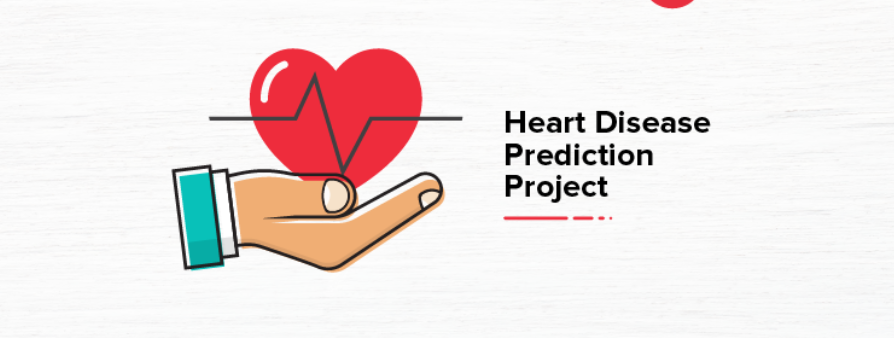

Heart Failure Prediction Dataset is available on kaggle.

Link to the dataset:

https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

## When Hearts Speak: Harnessing the Power of Data Science to Predict Heart Failure

Heart prediction analysis is an important area of study in the field of healthcare and data science. It involves the use of machine learning algorithms to predict the occurrence of heart failure in individuals based on their demographic, clinical and lifestyle factors. Heart failure is a serious medical condition that occurs when the heart is unable to pump enough blood to meet the body's needs, leading to symptoms such as shortness of breath, fatigue, and swelling in the legs and feet. By accurately predicting the occurrence of heart failure, healthcare providers can take preventive measures and improve patient outcomes. Heart prediction analysis can also help individuals take proactive steps to reduce their risk of heart failure by making lifestyle changes such as improving their diet, exercising more, and quitting smoking.

### 1. Loading the dataset

In [1]:
import warnings   
warnings.filterwarnings('ignore')  # hides all the warnings

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### 2. Data Stucture Analysis

#### Feature description

* **Age**: age of the patient [years]
* **Sex**: sex of the patient [M: Male, F: Female]
* **ChestPainType**: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* **RestingBP**: resting blood pressure [mm Hg]
* **Cholesterol**: serum cholesterol [mm/dl]
* **FastingBS**: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* **RestingECG**: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* **MaxHR**: maximum heart rate achieved [Numeric value between 60 and 202]
* **ExerciseAngina**: exercise-induced angina [Y: Yes, N: No]
* **Oldpeak**: oldpeak = ST [Numeric value measured in depression]
* **ST_Slope**: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* **HeartDisease**: output class [1: heart disease, 0: Normal]

In [4]:
data.shape

(918, 12)

In [5]:
data.drop_duplicates()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


After dropping the duplicates we see that the dataset has the same number of rows as that of original dataset, which means the dataset doesn't contain any duplicate row   

In [6]:
data['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [7]:
data.isna().all()

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [9]:
continuous = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']
categorical = ['ChestPainType', 'RestingECG', 'ST_Slope']
binary = ['Sex', 'FastingBS', 'ExerciseAngina']

In [10]:
data[continuous].describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,1.000000


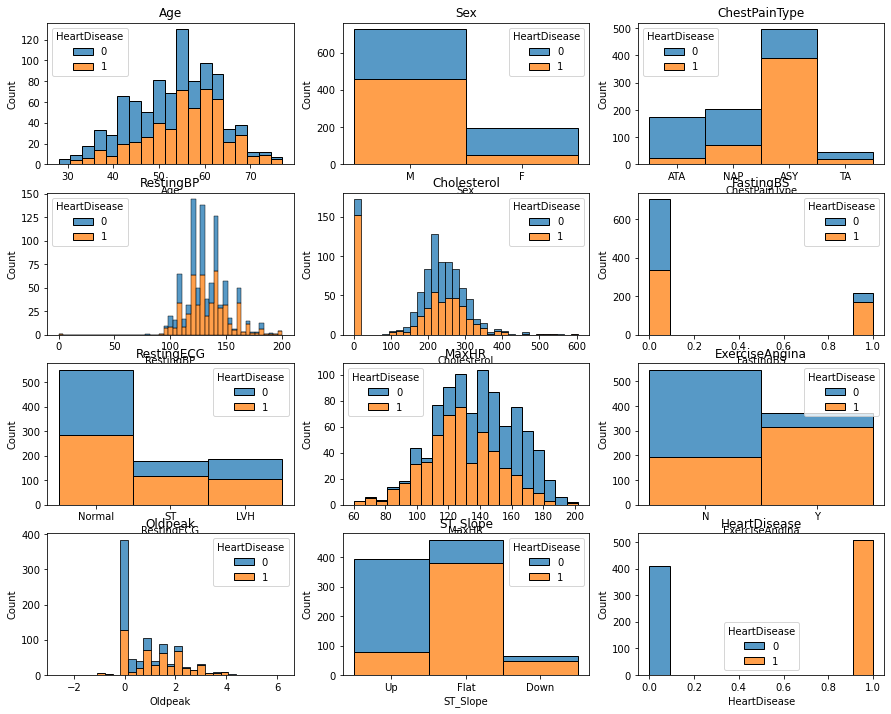

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,12))
for i,category in enumerate(data.columns):
    plt.subplot(4,3,i+1)
    sns.histplot(data=data, x=data[category], hue="HeartDisease", multiple="stack")
    plt.title(category)
plt.show()

Based on the visualization, we will analyse:
1. **Age:** Risk of suffering Heart Diseases increases with age. 

2. **Sex:** Number of males is greater than the number of females in the dataset. Moreover, male have greater risk of Heart Diseases.

3. **Chest Pain Type:** Number of people having Asymptomatic (ASY) Pain is highest among all and also the risk of having Heart Disease is greater in them. This is followed by the people having Non-Anginal Pain (NAP). The risk of having Heart Disease is same in the people having Typical Angina (TA) and Atypical Angina (ATA)

4. **Resting BP:** We see in this histogram a slight increase in the Heart Diseases when increase the resting blood pressure. Here, we observe that there exists zero values of blood pressure, this is incorrect we must treat them.

5. **Cholesterol:** We see a slight increase in the Heart Diseases when increase Cholesterol. Here, we observe that there exists zero values and value too high (atypical cases) of serum cholesterol, this is incorrect we must treat them.

6. **FastingBS:** People having high blood sugar level while fasting are more prone to the risk of Heart Diseases.

7. **RestingECG:** The majority cases of patients with Heart Diseases present normal resting electrocardiograms, but we observe that in the cases that present ST-T wave abnormality the amount of patients with Heart Diseases are two times more than patientes that not suffering Heart Diseases. Similarly, the risk of Heart Diseases is slightly more in left ventricular hypertrophy.

8. **MaxHR:** Patients with Heart Diseases present low values of maximum heart rate, while that patients with normal conditions present values more high. 

9. **ExerciseAngina:** The majority of patients with Heart Diseases face exercise-induced angina.

10. **OldPeak:** We can observe that patients with Heart Diseases present high values of depression as well as zero values of depression.

11. **ST_Slope:** Upsloping ST segment can be generally considered normal, but flat ST segment and downsloping ST segment can be considered like anomalies, and they are present in the majority cases of patients with Heart Diseases.

12. **HeartDiseases:** The number of people having Heart Diseases is greater than that of people not having Heart Diseases

### 3. Outlier detection:

As we have seen above, there exists some abnormal values for resting BP and Cholesterol. These abnormalities must be removed.

Here, we use Winsorization technique to remove the outliers. We Winsorize the data based on the limits of the boxplot using the numpy.where() function. This function replaces values in the data array that are below the lower limit with the lower limit, values that are above the upper limit with the upper limit, and values that are within the limits with the original value.

#### Resting BP

<AxesSubplot:xlabel='RestingBP'>

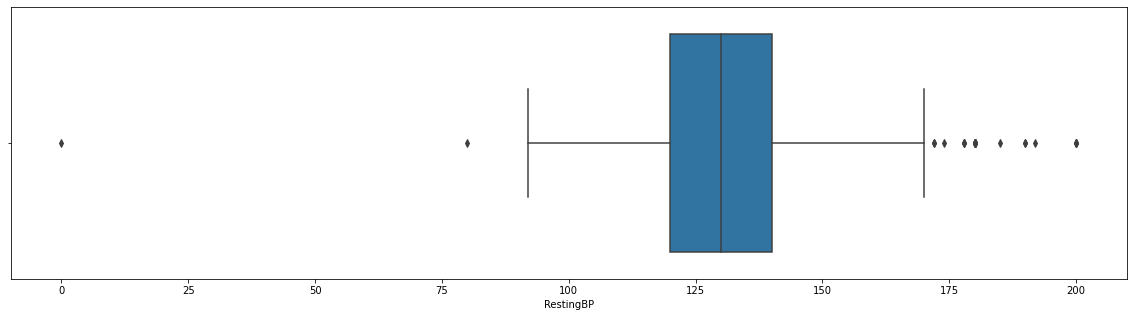

In [12]:
plt.figure(figsize=(20,5))
sns.boxplot(data=data, x='RestingBP')

In [13]:
# detecting and treating the outliers
Q1 = data['RestingBP'].quantile(0.25)
Q3 = data['RestingBP'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q3 - (1.5 * IQR)
upper_limit = Q3 + (1.5 * IQR)

# Winsorize the data based on the limits of the boxplot
data['RestingBP'] = np.where(data['RestingBP'] < lower_limit, lower_limit, np.where(data['RestingBP'] > upper_limit, upper_limit, data['RestingBP']))

<AxesSubplot:xlabel='RestingBP'>

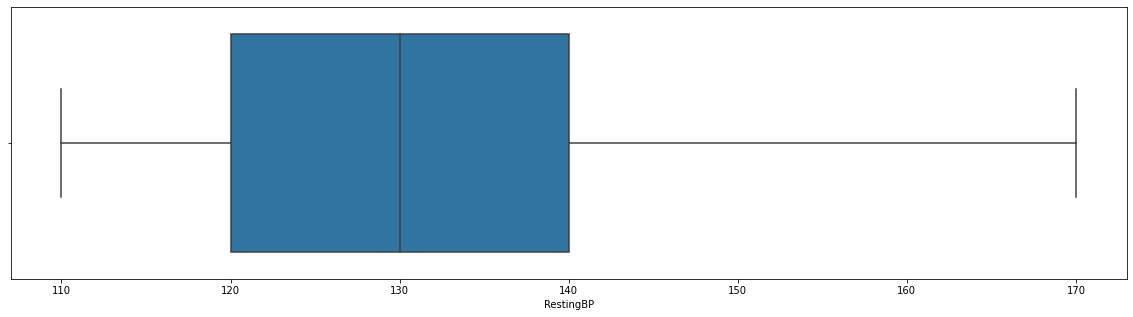

In [14]:
plt.figure(figsize=(20,5))
sns.boxplot(data=data, x='RestingBP')

#### Cholesterol

<AxesSubplot:xlabel='Cholesterol'>

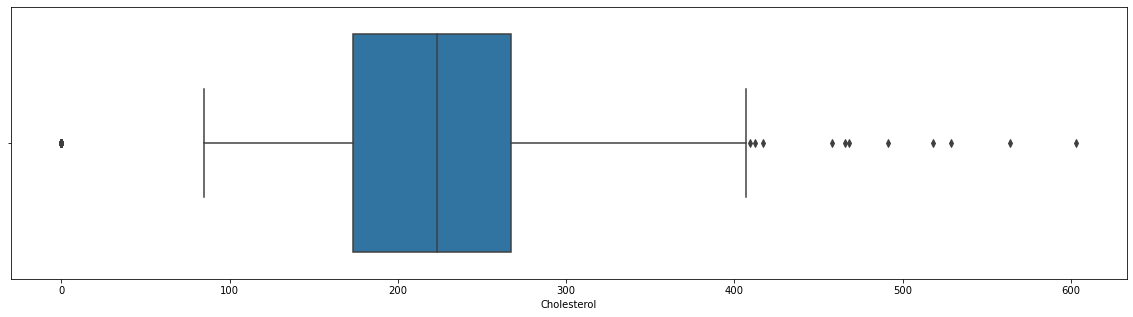

In [15]:
plt.figure(figsize=(20,5))
sns.boxplot(data=data, x='Cholesterol')

In [16]:
# detecting and treating the outliers
Q1 = data['Cholesterol'].quantile(0.25)
Q3 = data['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q3 - (1.5 * IQR)
upper_limit = Q3 + (1.5 * IQR)

# Winsorize the data based on the limits of the boxplot
data['Cholesterol'] = np.where(data['Cholesterol'] < lower_limit, lower_limit, np.where(data['Cholesterol'] > upper_limit, upper_limit, data['Cholesterol']))

<AxesSubplot:xlabel='Cholesterol'>

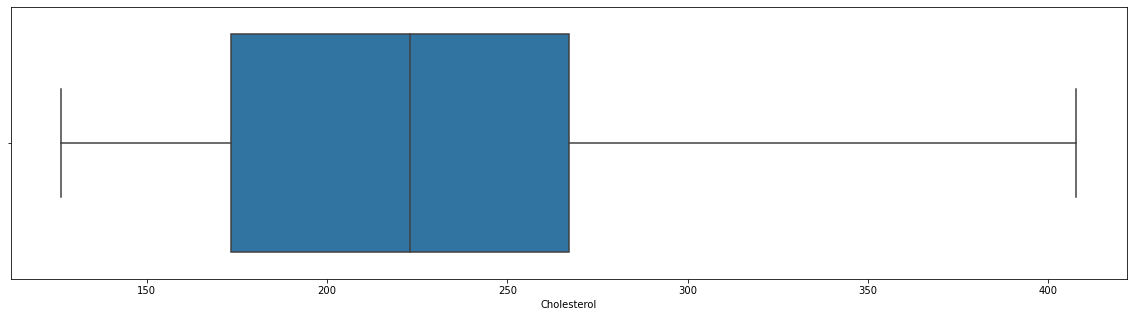

In [17]:
plt.figure(figsize=(20,5))
sns.boxplot(data=data, x='Cholesterol')

Thus, the outliers have benn successfully removed from our dataset.

### 4. Exploratory Data analysis

#### Pair Plot

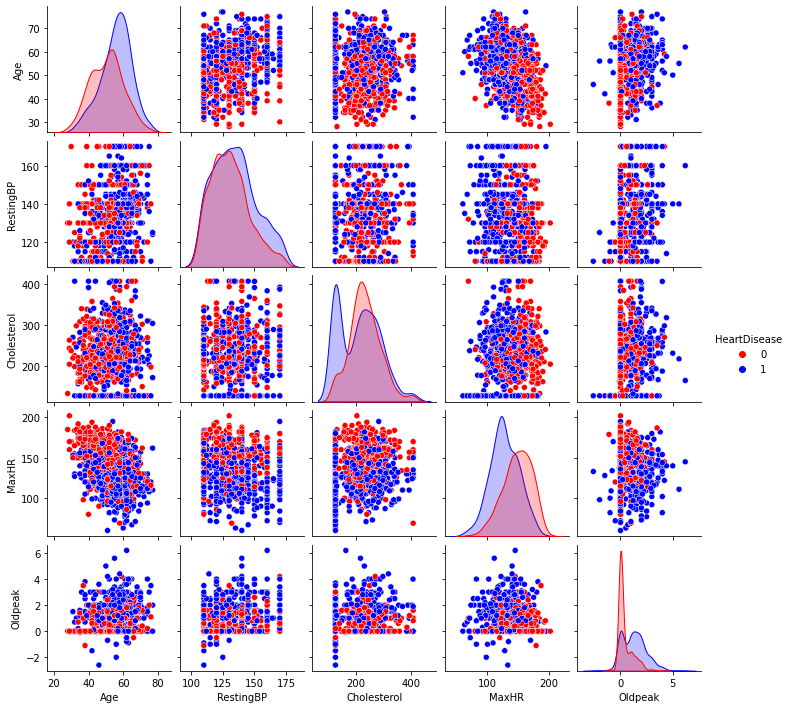

In [18]:
# plotting a pair plot
sns.pairplot(data[continuous], hue='HeartDisease', height=2, palette=['red','blue'])

([<matplotlib.patches.Wedge at 0x1f5b5e278e0>,
 [Text(-0.1835941114214546, 1.0845705151124876, 'Heart Disease'),
  Text(0.1835941114214547, -1.0845705151124876, 'Normal')],
 [Text(-0.10014224259352068, 0.5915839173340841, '55.3%'),
  Text(0.10014224259352074, -0.5915839173340841, '44.7%')])

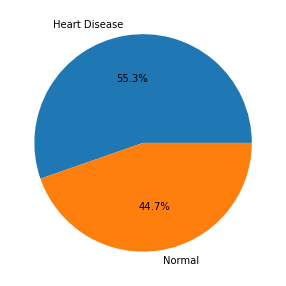

In [19]:
plt.figure(figsize=(5,5))
plt.pie(list(data['HeartDisease'].value_counts()), 
        labels=['Heart Disease','Normal'], autopct='%1.1f%%')

#### Correlation Heatmap

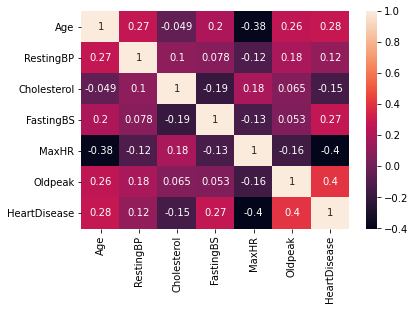

In [20]:
# correlation heatmap
sns.heatmap(data.corr(), annot=True)
plt.show()

The above heatmap does not show correlation coefficients for categorical variables; therefore, we need to handle categorical variables differently.

### 5. Handling Categorical Variables

We have some categorical variables available now we need to handle them. Now there is a function to take care of all categorical variables with pandas that is one hot encoding. one-hot encoding aims to transform a categorical variable with n outputs into n binary variables.

In [21]:
data = pd.get_dummies(data)
data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160.0,180.0,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130.0,283.0,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138.0,214.0,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150.0,195.0,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


### 6. Balancing the dataset

Balancing the dataset refers to the process of equalizing the number of observations or samples across different classes in a classification problem. In a balanced dataset, each class has roughly the same number of observations, whereas in an imbalanced dataset, one or more classes may have a disproportionate number of observations compared to others.

Balancing the dataset is necessary to ensure that the machine learning model learns from all classes equally and does not become biased towards the majority class. If the dataset is imbalanced, the model may achieve high accuracy by predicting only the majority class, while performing poorly on the minority classes. This is especially important in applications where misclassification of the minority class is more costly than the majority class, such as in medical diagnosis or fraud detection.

In [22]:
# subset only the ones with heart disease, and then only without any heart disease
heart_disease = data.loc[data['HeartDisease'] == 1] 
normal = data.loc[data['HeartDisease'] == 0]

# sample the heart disease to be the same number as there are normals
heart_disease = heart_disease.sample(len(normal), random_state=10)\

# concatenate the dataframes
balance = pd.concat([heart_disease, normal])

### 7. Train Test Split

In [23]:
from sklearn.model_selection import train_test_split

y = data['HeartDisease']
X = data.drop(['HeartDisease'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=53)

### 8. Feature Engineering

**Standardization** is a common technique in feature engineering that involves transforming numerical data to have a standard mean and standard deviation. This is done in order to make the numerical features more comparable and easier to work with.

In standardization, the mean of the data is subtracted from each observation, and the result is divided by the standard deviation. This centers the data at 0 and scales it to have a standard deviation of 1. This can be expressed mathematically as:

z = (x - mu) / sigma

Where:

* x is the original feature value
* mu is the mean of the feature values
* sigma is the standard deviation of the feature values
* z is the standardized feature value

Standardization is often used as a preprocessing step before applying certain machine learning algorithms, such as those that are sensitive to the scale of the input features. It can also help to improve the performance and interpretability of the model.



In [24]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### 9. Understanding the Evaluation Metrics

The main focus while calculating the metrics in heart failure prediction analysis should be on accurately identifying patients who are at risk of heart failure. This means minimizing false negatives, or cases where the model predicts that a patient is not at risk of heart failure when they actually are. False negatives can be very dangerous in medical applications, as they can lead to patients not receiving necessary treatment and care.

Therefore, metrics like recall and F1 score, which focus on minimizing false negatives, should be prioritized. Additionally, it is important to balance these metrics with other considerations, such as the specificity of the model, the prevalence of the condition in the population, and the potential consequences of false positives (e.g., unnecessary medical procedures, anxiety for patients).

Overall, the goal is to find a balance between sensitivity (the ability to correctly identify true positives) and specificity (the ability to correctly identify true negatives), and to evaluate the model's performance based on its ability to accurately identify patients who are at risk of heart failure while minimizing the risk of false positives and false negatives.

To find a balance between sensitivity and specificity in a classification problem, one can use a metric that considers both of these measures together, such as the F1 score.

The F1 score is a harmonic mean of precision and recall (or sensitivity) and is calculated as:

**F1 score = 2 * (precision * recall) / (precision + recall)**

### 10. Applying the Algorithms

Here, we define a function named 'model' that takes the classifier and the parameter grids for that classifier as arguments. We can then call this function with different algorithms to fit and tune the model using the provided parameter grids.

In addition, we create three empty lists: 'algorithms', 'train_accuracy', and 'test_accuracy'. After calling the 'model' function with different classifiers and their respective parameter grids, we append the obtained train and test accuracy values to their respective lists. This allows us to create a dataframe comparing the accuracy scores of different algorithms at the end.

In [25]:
algorithms = []
train_F1_score = []
test_F1_score = []

In [26]:
def model(x, param_grid):
    # perform grid search with cross-validation
    grid = GridSearchCV(x, param_grid, cv=5)
    grid.fit(X_train, y_train)
    pred_train = grid.predict(X_train)
    pred_test = grid.predict(X_test)
    score_train = f1_score(pred_train, y_train)
    score_test = f1_score(pred_test, y_test)
    conf_matrix = confusion_matrix(pred_test, y_test)
    
    # update the dataframe
    algorithms.append(x)
    train_F1_score.append(score_train)
    test_F1_score.append(score_test)

    # print the best hyperparameters and test set accuracy
    print(f"Best hyperparameters: {grid.best_params_}")
    print(f"Train set F1 score: {score_train}")
    print(f"Test set F1 score: {score_test}")
    print(f"Confusion Matrix for Test dataset: \n{sns.heatmap(conf_matrix, annot=True)}")

#### 10.1 KNN

Best hyperparameters: {'n_neighbors': 11, 'weights': 'uniform'}
Train set F1 score: 0.888888888888889
Test set F1 score: 0.8679245283018868
Confusion Matrix for Test dataset: 
AxesSubplot(0.125,0.125;0.62x0.755)


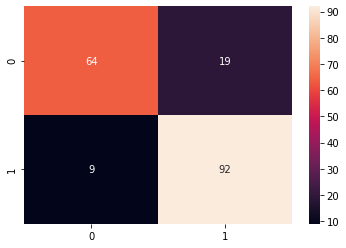

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.neighbors import KNeighborsClassifier

# define the grid of hyperparameters to search over
knn_param_grid = {
    'n_neighbors': [3,5,7,9,11,13],
    'weights': ['uniform', 'distance']
}

# define the classifier
knn = KNeighborsClassifier() 
model(knn, knn_param_grid)

#### 10.2 Logistic Regression

Best hyperparameters: {'C': 1, 'penalty': 'l2'}
Train set F1 score: 0.8787128712871288
Test set F1 score: 0.8949771689497718
Confusion Matrix for Test dataset: 
AxesSubplot(0.125,0.125;0.62x0.755)


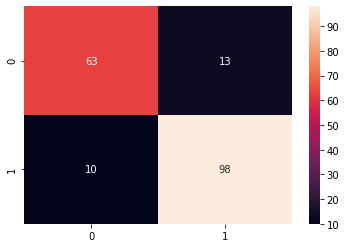

In [28]:
from sklearn.linear_model import LogisticRegression

# define the grid of hyperparameters to search over
logreg_param_grid = {
    'C': [0.1,1,10,100],
    'penalty': ['l1', 'l2']
}

# define the classifier
logreg = LogisticRegression() 
model(logreg, logreg_param_grid)

#### 10.3 Decision Tree

Best hyperparameters: {'max_depth': 3, 'min_samples_split': 2}
Train set F1 score: 0.8693467336683417
Test set F1 score: 0.8571428571428571
Confusion Matrix for Test dataset: 
AxesSubplot(0.125,0.125;0.62x0.755)


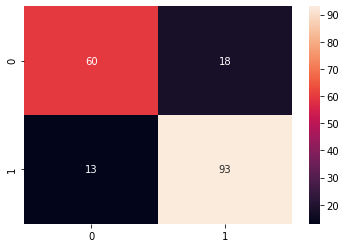

In [29]:
from sklearn.tree import DecisionTreeClassifier

# define the grid of hyperparameters to search over
tree_param_grid = {
    'max_depth': [1,2,3,5,7,9],
    'min_samples_split': [1,2, 5, 10, 15]
}

# define the classifier
tree = DecisionTreeClassifier() 
model(tree, tree_param_grid)

#### 10.4 Random Forest

Best hyperparameters: {'max_depth': 9, 'min_samples_split': 10, 'n_estimators': 100}
Train set F1 score: 0.9353233830845771
Test set F1 score: 0.9066666666666667
Confusion Matrix for Test dataset: 
AxesSubplot(0.125,0.125;0.62x0.755)


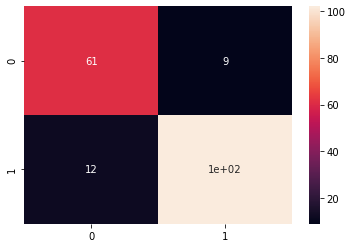

In [30]:
from sklearn.ensemble import RandomForestClassifier

# define the grid of hyperparameters to search over
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10, 15]
}

# define the classifier
rf = RandomForestClassifier()
model(rf, rf_param_grid)

#### 10.5 xG Boost

Best hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
Train set F1 score: 0.9614906832298138
Test set F1 score: 0.918918918918919
Confusion Matrix for Test dataset: 
AxesSubplot(0.125,0.125;0.62x0.755)


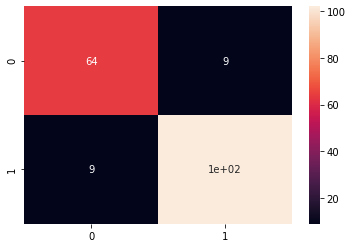

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

# define the grid of hyperparameters to search over
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# define the classifier
xgb = GradientBoostingClassifier()
model(xgb, xgb_param_grid)

#### 10.6 Support Vector Machine

Best hyperparameters: {'C': 0.1, 'kernel': 'rbf'}
Train set F1 score: 0.8872727272727273
Test set F1 score: 0.8859649122807018
Confusion Matrix for Test dataset: 
AxesSubplot(0.125,0.125;0.62x0.755)


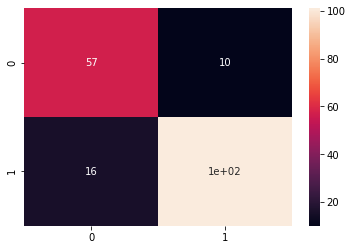

In [32]:
from sklearn.svm import SVC

# define the grid of hyperparameters to search over
svc_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# define the classifier
svc = SVC()
model(svc, svc_param_grid)

In [34]:
dataframe = pd.DataFrame(columns=['Algorithms', 'Train F1 score', 'Test F1 score'])
dataframe['Algorithms'] = algorithms
dataframe['Train F1 score'] = train_F1_score
dataframe['Test F1 score'] = test_F1_score
dataframe

,Algorithms,Train F1 score,Test F1 score
0,KNeighborsClassifier(),0.888889,0.867925
1,LogisticRegression(),0.878713,0.894977
2,DecisionTreeClassifier(),0.869347,0.857143
3,RandomForestClassifier(),0.935323,0.906667
4,GradientBoostingClassifier(),0.961491,0.918919
5,SVC(),0.887273,0.885965


In conclusion, we conducted a heart prediction analysis using several machine learning algorithms, including knn, logistic regression, decision tree, random forest, gradient boosting and support vector machine. We prepared the data by performing exploratory data analysis, dealing with missing values, and encoding categorical variables. We then split the data into training and testing sets and applied feature scaling to improve model performance.

We observed that the train scores was slightly greater than the test scores for all algorithms. Our results showed that the gradient boosting algorithm achieved the highest F1 score of **91.8%** for the test data, followed closely by the random forest algorithm with an F1 score of **91.1%**. The logistic regression and support vector machine algorithms also performed well with F1 scores of **89.4%** and **88.5%**, respectively.
